In [16]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Get the project's root directory
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Go up one level

# Add the project root to sys.path
if project_root not in sys.path:
    sys.path.append(project_root)

# Import the project's modules
from figure_manager import FigureManager
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Saved full figure to figures/final_figure.pdf
Saved subplot to figures/final_figure_subplot_1.pdf
Saved subplot to figures/final_figure_subplot_2.pdf
Saved subplot to figures/final_figure_subplot_3.pdf


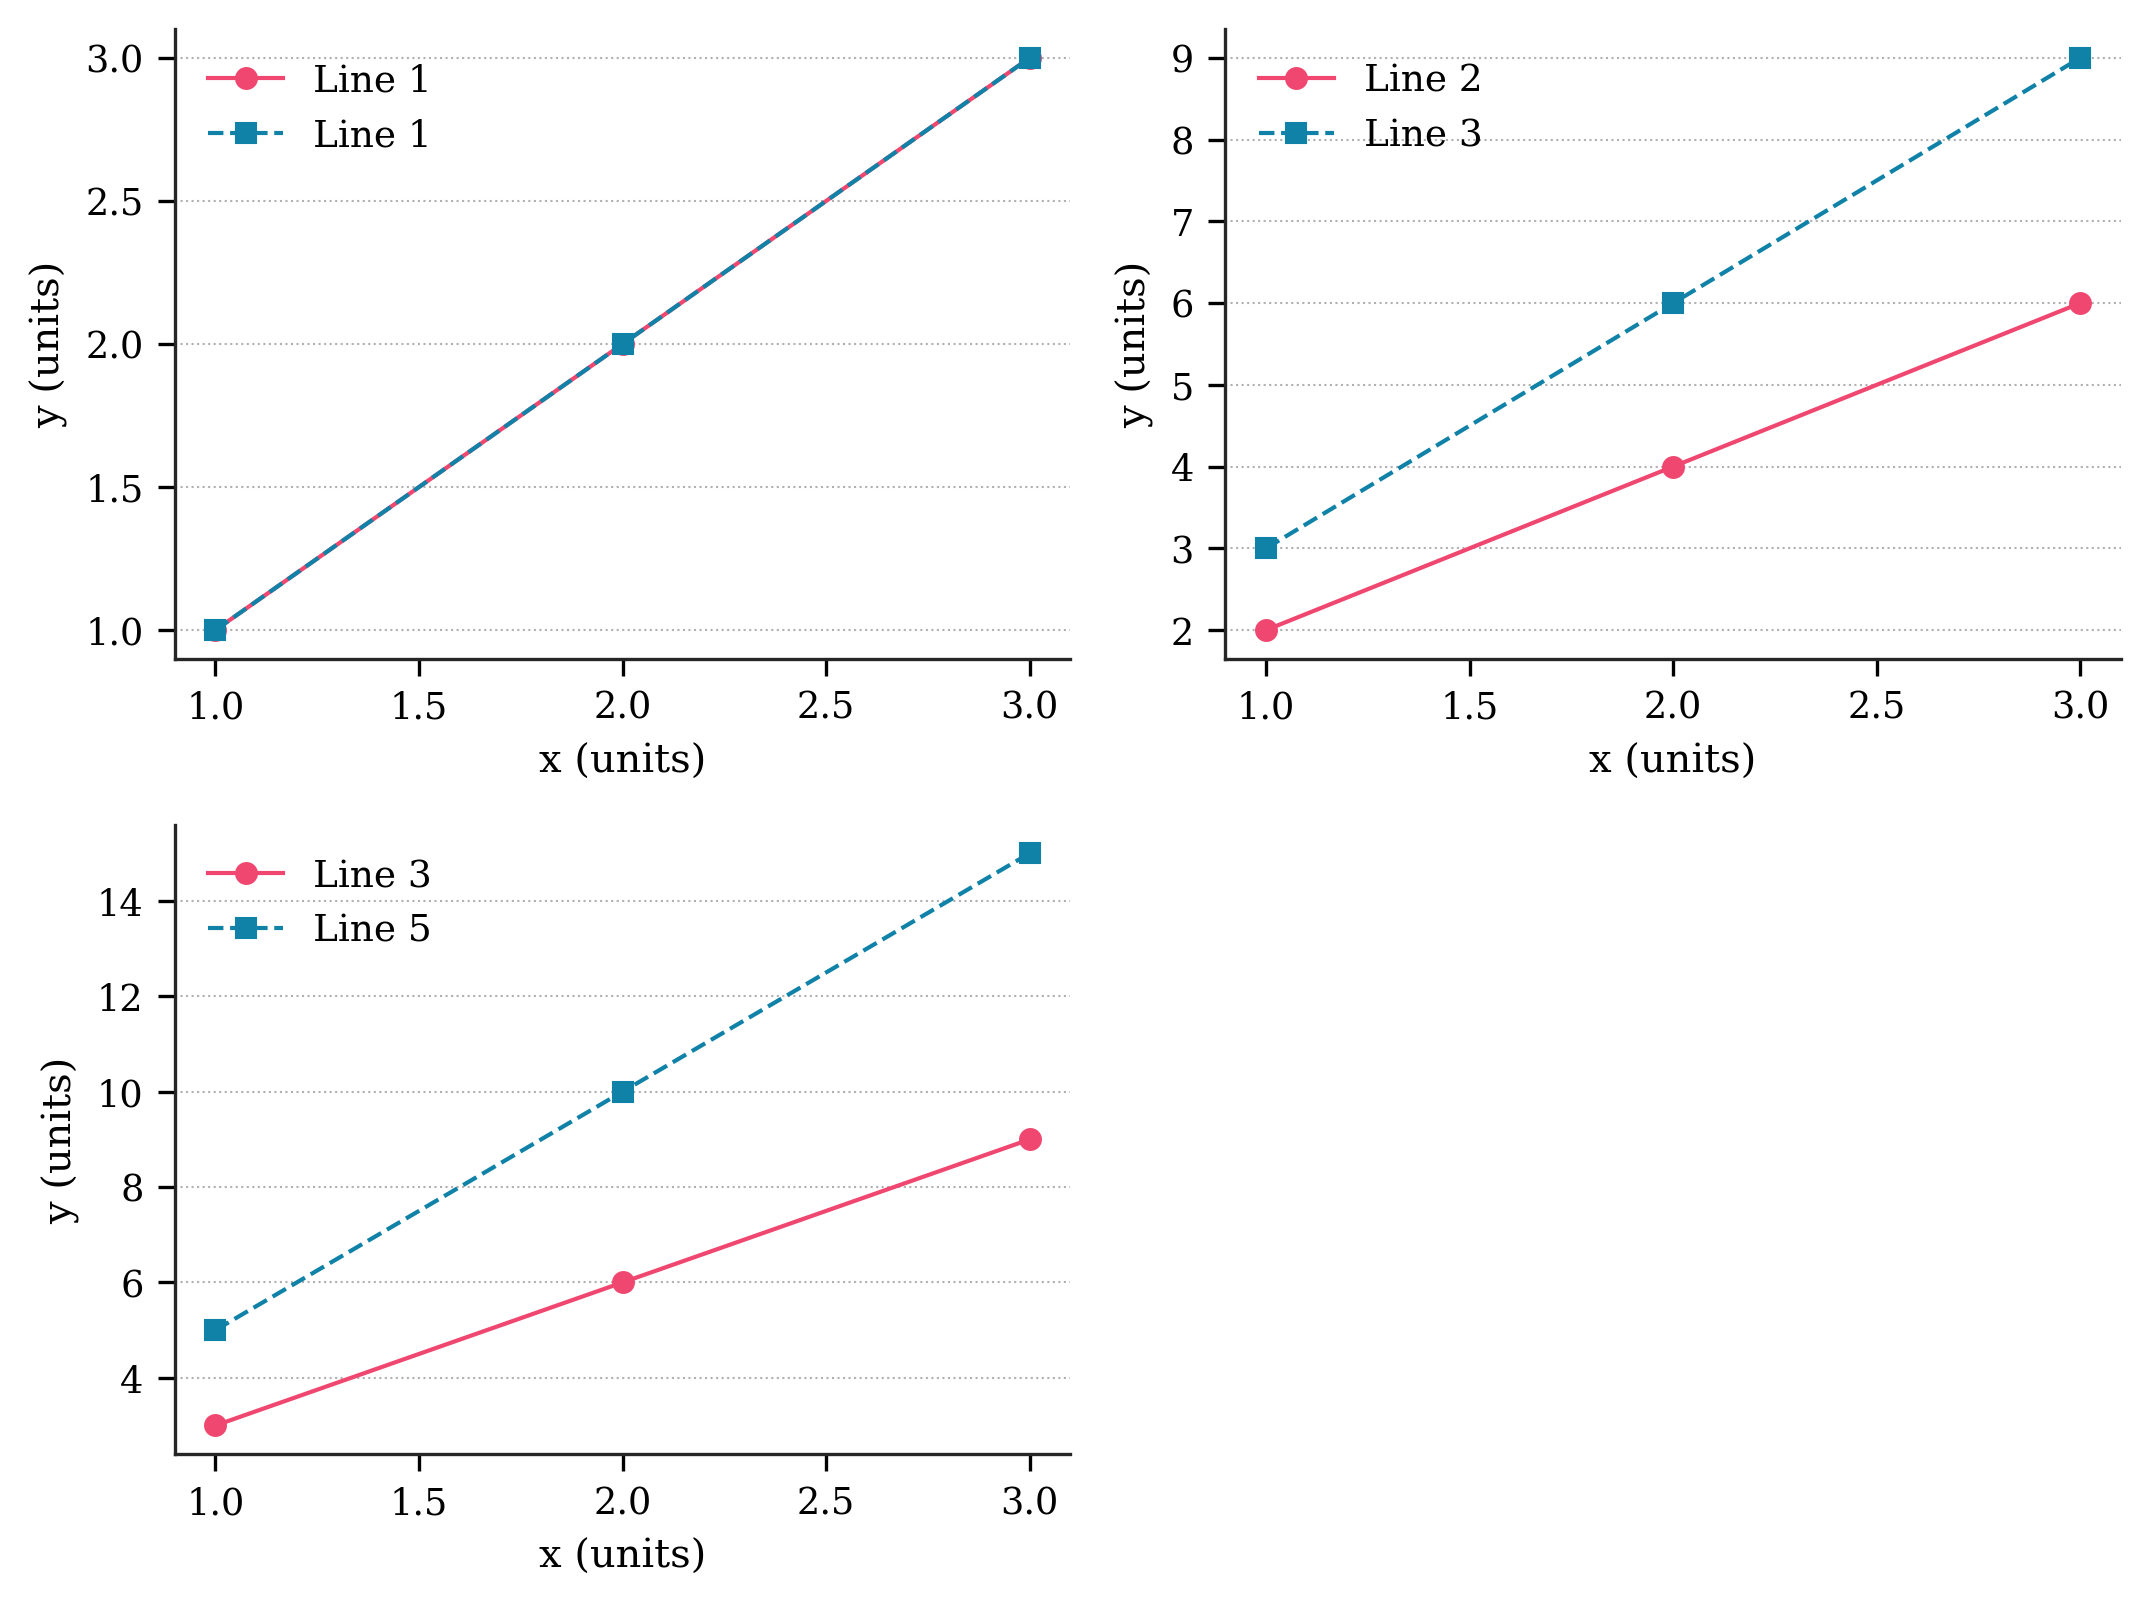

In [18]:
# Set up the FigureManager
fm = FigureManager(output_dir="figures/", paper_size="A4", file_ext=".pdf", use_latex=False)

# Create figure and subplot managers with specified layout
fig, axes = fm.create_figure(n_rows=2, n_cols=2, n_subplots=3)

# Example: Add some dummy plots
for i, ax in enumerate(axes):
    ax.plot([1, 2, 3], [i+1, (i+1)*2, (i+1)*3], label=f"Line {i+1}")
    ax.plot([1, 2, 3], [i*2+1, (i*2+1)*2, (i*2+1)*3], label=f"Line {i*2+1}")
    ax.set_xlabel(r"x (units)")  # LaTeX syntax
    ax.set_ylabel(r"y (units)")
    ax.legend()

# Save the entire figure and subplots
fm.save_figure(filename="final_figure")

# Optional: Display the figure
plt.show()